<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Load-Data" data-toc-modified-id="Load-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Load Data</a></span><ul class="toc-item"><li><span><a href="#User-Dataset" data-toc-modified-id="User-Dataset-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>User Dataset</a></span></li><li><span><a href="#User-Engagement-Dataset" data-toc-modified-id="User-Engagement-Dataset-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>User Engagement Dataset</a></span></li></ul></li><li><span><a href="#Data-Wrangling" data-toc-modified-id="Data-Wrangling-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Data Wrangling</a></span><ul class="toc-item"><li><span><a href="#User-Dataset" data-toc-modified-id="User-Dataset-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>User Dataset</a></span></li><li><span><a href="#Engagement-Dataset" data-toc-modified-id="Engagement-Dataset-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Engagement Dataset</a></span></li><li><span><a href="#Merge-User-and-Engagement-Datasets" data-toc-modified-id="Merge-User-and-Engagement-Datasets-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Merge User and Engagement Datasets</a></span></li></ul></li><li><span><a href="#EDA" data-toc-modified-id="EDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Creation-Time" data-toc-modified-id="Creation-Time-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Creation Time</a></span></li><li><span><a href="#Last-Session-Creation-Time" data-toc-modified-id="Last-Session-Creation-Time-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Last Session Creation Time</a></span></li><li><span><a href="#Opted-in-to-Mailing-List" data-toc-modified-id="Opted-in-to-Mailing-List-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Opted in to Mailing List</a></span></li><li><span><a href="#Enabled-for-Marketing-Drip" data-toc-modified-id="Enabled-for-Marketing-Drip-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Enabled for Marketing Drip</a></span></li><li><span><a href="#Organization-ID" data-toc-modified-id="Organization-ID-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Organization ID</a></span></li><li><span><a href="#Creation-Source" data-toc-modified-id="Creation-Source-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Creation Source</a></span></li><li><span><a href="#Invited-by-User-Id" data-toc-modified-id="Invited-by-User-Id-3.7"><span class="toc-item-num">3.7&nbsp;&nbsp;</span>Invited by User Id</a></span></li><li><span><a href="#Number-of-Visit" data-toc-modified-id="Number-of-Visit-3.8"><span class="toc-item-num">3.8&nbsp;&nbsp;</span>Number of Visit</a></span></li></ul></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Preprocessing</a></span></li><li><span><a href="#Select-Important-Feature" data-toc-modified-id="Select-Important-Feature-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Select Important Feature</a></span></li></ul></div>

**The goal of this project is to identify which factors predict future user adoption. Here, we consider future user as the new users who create account after the last date of the dataset.**

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from datetime import datetime as dt
from collections import defaultdict
import seaborn as sns

## Load Data

### User Dataset

In [2]:
# Load the dataset that includes 12,000 users who signed up for the product in the last two years
user = pd.read_csv(
    '/Users/lasayin/Desktop/Springboard/GitHub/Springboard_DS_Projects/Data/TakeHomeChallenge/takehome_users.csv',
parse_dates=['creation_time'])

In [3]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 937.6+ KB


In [4]:
user.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


**Columns Description:**

● name: the user's name

● object_id: the user's id

● email: email address

● creation_source: how their account was created. This takes on one of 5 values:

    ○ PERSONAL_PROJECTS: invited to join another user's personal workspace
    
    ○ GUEST_INVITE: invited to an organization as a guest (limited permissions)
    
    ○ ORG_INVITE: invited to an organization (as a full member)
    
    ○ SIGNUP: signed up via the website
    
    ○ SIGNUP_GOOGLE_AUTH: signed up using Google Authentication (using a Google email account for their login id)
    
● creation_time: when they created their account

● last_session_creation_time: unix timestamp of last login

● opted_in_to_mailing_list: whether they have opted into receiving marketing emails

● enabled_for_marketing_drip: whether they are on the regular marketing email drip

● org_id: the organization (group of users) they belong to

● invited_by_user_id: which user invited them to join (if applicable).

### User Engagement Dataset

In [5]:
# Load the dataset that has a row for each day when a user logged into the product
engagement = pd.read_csv(
    '/Users/lasayin/Desktop/Springboard/GitHub/Springboard_DS_Projects/Data/TakeHomeChallenge/takehome_user_engagement.csv',
parse_dates=['time_stamp'])

In [6]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   time_stamp  207917 non-null  datetime64[ns]
 1   user_id     207917 non-null  int64         
 2   visited     207917 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 4.8 MB


In [7]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


## Data Wrangling

### User Dataset

In [8]:
# Convert unix timestamp to datetime
user.last_session_creation_time = user.last_session_creation_time.apply(pd.to_datetime, errors='coerce', unit='s')

# Keep date of the datetime columns  only
user.creation_time = user.creation_time.apply(lambda x: dt.date(x))
user.last_session_creation_time = user.last_session_creation_time.apply(lambda x: dt.date(x))

# Drop personal infomation columns, i.e., name, email
user.drop(columns=['name', 'email'], inplace=True)

user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   12000 non-null  int64  
 1   creation_time               12000 non-null  object 
 2   creation_source             12000 non-null  object 
 3   last_session_creation_time  12000 non-null  object 
 4   opted_in_to_mailing_list    12000 non-null  int64  
 5   enabled_for_marketing_drip  12000 non-null  int64  
 6   org_id                      12000 non-null  int64  
 7   invited_by_user_id          6417 non-null   float64
dtypes: float64(1), int64(4), object(3)
memory usage: 750.1+ KB


In [9]:
user.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22,GUEST_INVITE,2014-04-22,1,0,11,10803.0
1,2,2013-11-15,ORG_INVITE,2014-03-31,0,0,1,316.0
2,3,2013-03-19,ORG_INVITE,2013-03-19,0,0,94,1525.0
3,4,2013-05-21,GUEST_INVITE,2013-05-22,0,0,1,5151.0
4,5,2013-01-17,GUEST_INVITE,2013-01-22,0,0,193,5240.0


### Engagement Dataset

In [10]:
engagement.visited.unique()

array([1])

In [11]:
# Remove visited column which provides no additional infomation
engagement.drop(columns='visited', inplace=True)

# Convert datetime to date
engagement.time_stamp = engagement.time_stamp.apply(lambda x: dt.date(x))

engagement.head()

,time_stamp,user_id
0,2014-04-22,1
1,2013-11-15,2
2,2013-11-29,2
3,2013-12-09,2
4,2013-12-25,2


In [12]:
# Build a dictionary of which the key is user id and the value is a list of time stamp
user_dict = defaultdict(list)
for i in range(engagement.shape[0]):    
    key = engagement.iloc[i, 1]
    value = engagement.iloc[i, 0]
    user_dict[key].append(value)

user_dict

defaultdict(list,
            {1: [datetime.date(2014, 4, 22)],
             2: [datetime.date(2013, 11, 15),
              datetime.date(2013, 11, 29),
              datetime.date(2013, 12, 9),
              datetime.date(2013, 12, 25),
              datetime.date(2013, 12, 31),
              datetime.date(2014, 1, 8),
              datetime.date(2014, 2, 3),
              datetime.date(2014, 2, 8),
              datetime.date(2014, 2, 9),
              datetime.date(2014, 2, 13),
              datetime.date(2014, 2, 16),
              datetime.date(2014, 3, 9),
              datetime.date(2014, 3, 13),
              datetime.date(2014, 3, 31)],
             3: [datetime.date(2013, 3, 19)],
             4: [datetime.date(2013, 5, 22)],
             5: [datetime.date(2013, 1, 22)],
             6: [datetime.date(2013, 12, 19)],
             7: [datetime.date(2012, 12, 20)],
             10: [datetime.date(2013, 1, 16),
              datetime.date(2013, 1, 22),
              datetime.da

In [13]:
# Build a list to store adopted user, i.e., 
# a user who has logged into the product on three separate days in at least one seven-day period
adopted_user_list = []
for key, value in user_dict.items():
    # Remove the duplicated date
    value = list(set(value))
    if len(value) >= 3: # Select the users who has logged into the product more than three times(on separate days)
        for i in range(len(value)-2):
            # Select the users who has logged into the product on three separate days in 
            # at least one seven-day period
            if (value[i+2] - value[i]).days <= 7: 
                adopted_user_list.append(key)
                break

In [14]:
# Add adopted_user column and set default value 0
engagement['adopted_user'] = 0
# Assign adopted_user with 1 to label the users who meet the requirement
index = engagement[engagement.user_id.apply(lambda x: x in adopted_user_list)].index
engagement.iloc[index, 2] = 1

# Check the numbers of adopted user and non-adopted user
engagement.groupby('adopted_user').nunique().user_id

adopted_user
0    6687
1    2136
Name: user_id, dtype: int64

In [15]:
# Build a dataframe to store number of visits by user and adopted_user label
engagement_status = engagement.groupby('user_id').agg({'time_stamp':'count', 'adopted_user':'mean'}).reset_index()
engagement_status.rename({'time_stamp':'num_visit'},axis=1, inplace=True)
engagement_status

,user_id,num_visit,adopted_user
0,1,1,0
1,2,14,1
2,3,1,0
3,4,1,0
4,5,1,0
...,...,...,...
8818,11996,1,0
8819,11997,1,0
8820,11998,1,0
8821,11999,1,0


### Merge User and Engagement Datasets

In [16]:
user_eng = user.merge(engagement_status, left_on='object_id', right_on='user_id', how='left')
user_eng.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,num_visit,adopted_user
0,1,2014-04-22,GUEST_INVITE,2014-04-22,1,0,11,10803.0,1.0,1.0,0.0
1,2,2013-11-15,ORG_INVITE,2014-03-31,0,0,1,316.0,2.0,14.0,1.0
2,3,2013-03-19,ORG_INVITE,2013-03-19,0,0,94,1525.0,3.0,1.0,0.0
3,4,2013-05-21,GUEST_INVITE,2013-05-22,0,0,1,5151.0,4.0,1.0,0.0
4,5,2013-01-17,GUEST_INVITE,2013-01-22,0,0,193,5240.0,5.0,1.0,0.0


There are 12000 users in user dataset but only 8823 users in engagement dataset, so we will check the information of the users who are not in engagement dataset.

In [17]:
user_eng[user_eng.user_id.isna()]

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,user_id,num_visit,adopted_user
7,8,2013-07-31,PERSONAL_PROJECTS,0001-01-01,1,1,74,NaN,NaN,NaN,NaN
8,9,2013-11-05,PERSONAL_PROJECTS,0001-01-01,0,0,302,NaN,NaN,NaN,NaN
11,12,2014-04-17,ORG_INVITE,0001-01-01,0,0,130,9270.0,NaN,NaN,NaN
14,15,2013-07-16,PERSONAL_PROJECTS,0001-01-01,0,0,175,NaN,NaN,NaN,NaN
15,16,2013-02-11,PERSONAL_PROJECTS,0001-01-01,0,0,211,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
11975,11976,2013-12-25,PERSONAL_PROJECTS,0001-01-01,0,0,248,NaN,NaN,NaN,NaN
11977,11978,2014-04-23,PERSONAL_PROJECTS,0001-01-01,1,0,29,NaN,NaN,NaN,NaN
11984,11985,2013-07-08,PERSONAL_PROJECTS,0001-01-01,0,0,74,NaN,NaN,NaN,NaN
11992,11993,2013-03-28,PERSONAL_PROJECTS,0001-01-01,0,0,281,NaN,NaN,NaN,NaN


The last_session_creation_time column looks weird.

In [18]:
# Check last_session_creation_time column 
user_eng[user_eng.user_id.isna()].last_session_creation_time.value_counts()

0001-01-01    3177
Name: last_session_creation_time, dtype: int64

All the last_session_creation_time values are 0001-01-01, which were converted from unix time stamp. It's necessary to clarify what happen on this entries for a real-world dataset, but for this project, we will not take these users into account since we have no more information about these user's engagement status.

In [19]:
user_eng.adopted_user.value_counts(normalize=True)

0.0    0.757905
1.0    0.242095
Name: adopted_user, dtype: float64

In [20]:
# Merge user and engagement dataset with inner join
user_eng = user.merge(engagement_status, left_on='object_id', right_on='user_id', how='inner')
# Drop user_id
user_eng.drop(columns='user_id', inplace=True)
user_eng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   object_id                   8823 non-null   int64  
 1   creation_time               8823 non-null   object 
 2   creation_source             8823 non-null   object 
 3   last_session_creation_time  8823 non-null   object 
 4   opted_in_to_mailing_list    8823 non-null   int64  
 5   enabled_for_marketing_drip  8823 non-null   int64  
 6   org_id                      8823 non-null   int64  
 7   invited_by_user_id          4776 non-null   float64
 8   num_visit                   8823 non-null   int64  
 9   adopted_user                8823 non-null   int64  
dtypes: float64(1), int64(6), object(3)
memory usage: 758.2+ KB


In [21]:
user_eng.head()

,object_id,creation_time,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,num_visit,adopted_user
0,1,2014-04-22,GUEST_INVITE,2014-04-22,1,0,11,10803.0,1,0
1,2,2013-11-15,ORG_INVITE,2014-03-31,0,0,1,316.0,14,1
2,3,2013-03-19,ORG_INVITE,2013-03-19,0,0,94,1525.0,1,0
3,4,2013-05-21,GUEST_INVITE,2013-05-22,0,0,1,5151.0,1,0
4,5,2013-01-17,GUEST_INVITE,2013-01-22,0,0,193,5240.0,1,0


## EDA

In [22]:
user_eng.nunique()

object_id                     8823
creation_time                  730
creation_source                  5
last_session_creation_time     736
opted_in_to_mailing_list         2
enabled_for_marketing_drip       2
org_id                         417
invited_by_user_id            2229
num_visit                      402
adopted_user                     2
dtype: int64

### Creation Time

In [23]:
# Build cohort by account-creating month 
user_eng['month_account']= user_eng.creation_time.apply(lambda x: dt(x.year, x.month, 1))

2012-05-01     13
2012-06-01    287
2012-07-01    282
2012-08-01    269
2012-09-01    280
2012-10-01    305
2012-11-01    292
2012-12-01    302
2013-01-01    315
2013-02-01    301
2013-03-01    345
2013-04-01    325
2013-05-01    332
2013-06-01    318
2013-07-01    318
2013-08-01    375
2013-09-01    376
2013-10-01    396
2013-11-01    385
2013-12-01    382
2014-01-01    441
2014-02-01    411
2014-03-01    530
2014-04-01    542
2014-05-01    701
Name: month_account, dtype: int64


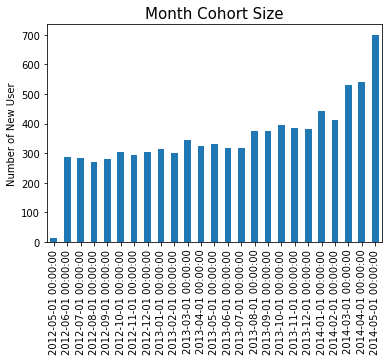

In [24]:
# Check the month cohort size
num_month_cohort = user_eng.month_account.value_counts().sort_index()
print(num_month_cohort)
num_month_cohort.plot.bar()
plt.ylabel('Number of New User')
_ = plt.title('Month Cohort Size', fontsize=15)

month_account
2012-05-01    0.230769
2012-06-01    0.285714
2012-07-01    0.276596
2012-08-01    0.301115
2012-09-01    0.271429
2012-10-01    0.255738
2012-11-01    0.270548
2012-12-01    0.258278
2013-01-01    0.250794
2013-02-01    0.302326
2013-03-01    0.237681
2013-04-01    0.243077
2013-05-01    0.268072
2013-06-01    0.289308
2013-07-01    0.232704
2013-08-01    0.224000
2013-09-01    0.271277
2013-10-01    0.275253
2013-11-01    0.270130
2013-12-01    0.235602
2014-01-01    0.263039
2014-02-01    0.221411
2014-03-01    0.300000
2014-04-01    0.178967
2014-05-01    0.061341
Name: adopted_user, dtype: float64


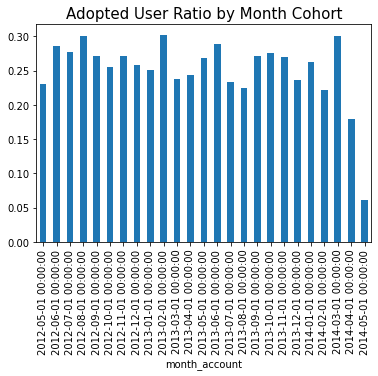

In [25]:
# Checkt the adopted_user ratio by month cohort
print(user_eng.groupby('month_account').mean().adopted_user)
user_eng.groupby('month_account').mean().adopted_user.plot.bar()
_ = plt.title('Adopted User Ratio by Month Cohort', fontsize=15)

It seems that there is no significant difference of adopted user ratio between months except 2014 April and May, while the cohort sizes of 2014 April and May are relatively high.

In [26]:
# Check the last login date of the dataset
user.last_session_creation_time.max()

datetime.date(2014, 6, 6)

The last login date of the dataset is 2014-06-06. For the user who created accounts in 2014 April and May, it's reasonable to consider them as having no enough time span to verify their engagement status so that these users will be removed.

In [27]:
# Remove the last two month cohort
user_eng = user_eng[user_eng.month_account < '2014-04-01']

user_eng.creation_time.max()

datetime.date(2014, 3, 31)

The creation_time and month_cohort will be removed as they can not provide more information.

In [28]:
user_eng.drop(columns=['creation_time', 'month_account'], inplace=True)

### Last Session Creation Time

Similarly, we can check the adopted user ratio by the last login time.

In [29]:
# Build cohort by last-login month
user_eng['month_last']= user_eng.last_session_creation_time.apply(lambda x: dt(x.year, x.month, 1))

2012-05-01      2
2012-06-01    200
2012-07-01    218
2012-08-01    199
2012-09-01    236
2012-10-01    251
2012-11-01    229
2012-12-01    248
2013-01-01    266
2013-02-01    243
2013-03-01    284
2013-04-01    290
2013-05-01    274
2013-06-01    278
2013-07-01    279
2013-08-01    319
2013-09-01    309
2013-10-01    329
2013-11-01    319
2013-12-01    318
2014-01-01    360
2014-02-01    357
2014-03-01    419
2014-04-01     84
2014-05-01    634
2014-06-01    635
Name: month_last, dtype: int64


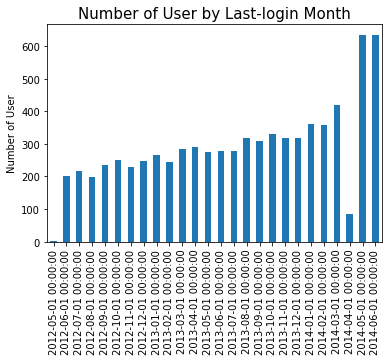

In [30]:
# Check the number of users by the last-login month
num_last_month = user_eng.month_last.value_counts().sort_index()
print(num_last_month)
num_last_month.plot.bar()
plt.ylabel('Number of User')
_ = plt.title('Number of User by Last-login Month', fontsize=15)

month_last
2012-05-01    0.000000
2012-06-01    0.005000
2012-07-01    0.050459
2012-08-01    0.085427
2012-09-01    0.118644
2012-10-01    0.099602
2012-11-01    0.096070
2012-12-01    0.084677
2013-01-01    0.109023
2013-02-01    0.148148
2013-03-01    0.080986
2013-04-01    0.137931
2013-05-01    0.113139
2013-06-01    0.179856
2013-07-01    0.125448
2013-08-01    0.100313
2013-09-01    0.126214
2013-10-01    0.115502
2013-11-01    0.103448
2013-12-01    0.100629
2014-01-01    0.111111
2014-02-01    0.114846
2014-03-01    0.131265
2014-04-01    0.654762
2014-05-01    0.988959
2014-06-01    1.000000
Name: adopted_user, dtype: float64


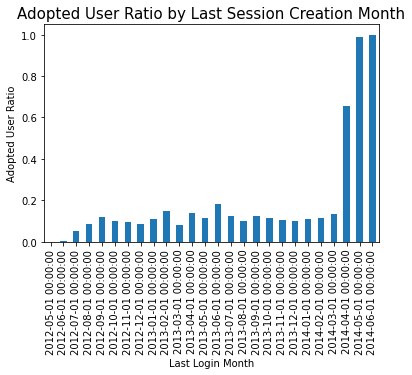

In [31]:
# Checkt the adopted_user ratio by last-login month
print(user_eng.groupby('month_last').mean().adopted_user)
user_eng.groupby('month_last').mean().adopted_user.plot.bar()
plt.title('Adopted User Ratio by Last Session Creation Month', fontsize=15)
plt.xlabel('Last Login Month')
_ = plt.ylabel('Adopted User Ratio')

**The performance of last three months is significantly different from the previous months:** 
* The adopted users ratios in last three months, i.e., 2014 June, May, and April, are much higher than previous months.
* The numbers of adopted users in 2014 May and June are very high and the number in April is extremely low.

There is no additional information available to explain the abnormal high adopted user ratio in 2014 June, May, and April. We will add a new feature to label if the user is active in these month.

high_month  adopted_user
0           0               5548
            1                679
1           0                 36
            1               1317
Name: object_id, dtype: int64


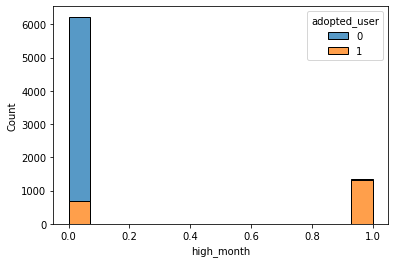

In [32]:
# Add a new column high_month to label if a user be active in and after 2014 April
user_eng['high_month'] = 0
user_eng.loc[user_eng[user_eng.month_last >= '2014-04-01'].index, 'high_month'] = 1

# Check the number of adopted_user by high_month
print(user_eng.groupby(['high_month', 'adopted_user']).count().object_id)
_ = sns.histplot(data=user_eng, x='high_month', hue='adopted_user', multiple='stack')

In [33]:
# Check adopted user ratio by high_month
user_eng.groupby('high_month').mean().adopted_user

high_month
0    0.109041
1    0.973392
Name: adopted_user, dtype: float64

In [34]:
user_eng[['high_month', 'adopted_user']].corr()

,high_month,adopted_user
high_month,1.000000,0.751494
adopted_user,0.751494,1.000000


All the data and plots show that `high_month` and `adopted_user` are strong correlated.

### Opted in to Mailing List

high_month  adopted_user
0           0               5548
            1                679
1           0                 36
            1               1317
Name: object_id, dtype: int64


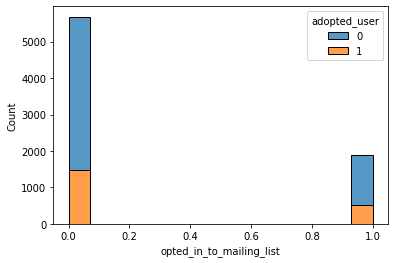

In [35]:
# Check numer of user by opted_in_to_mailing_list and adopted user label
print(user_eng.groupby(['high_month', 'adopted_user']).count().object_id)
_ = sns.histplot(data=user_eng, x='opted_in_to_mailing_list', hue='adopted_user', multiple='stack')

In [36]:
# Check adopted user ratio by opted_in_to_mailing_list
user_eng.groupby('opted_in_to_mailing_list').mean().adopted_user

opted_in_to_mailing_list
0    0.262315
1    0.266350
Name: adopted_user, dtype: float64

The number of users who did not opt in to the mailing list is almost three times that of users who opted in, but the difference of adopted user ratio is small.

### Enabled for Marketing Drip

enabled_for_marketing_drip  adopted_user
0                           0               4743
                            1               1688
1                           0                841
                            1                308
Name: object_id, dtype: int64


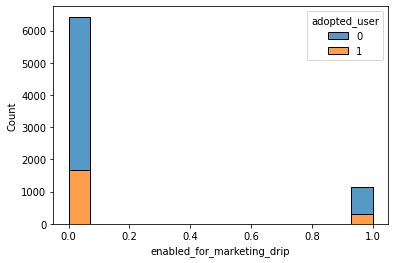

In [37]:
# Check numer of user by enabled_for_marketing_drip and adopted user label
print(user_eng.groupby(['enabled_for_marketing_drip', 'adopted_user']).count().object_id)
_ = sns.histplot(data=user_eng, x='enabled_for_marketing_drip', hue='adopted_user', multiple='stack')

In [38]:
# Check adopted user ratio by enabled_for_marketing_drip
user_eng.groupby('enabled_for_marketing_drip').mean().adopted_user

enabled_for_marketing_drip
0    0.262479
1    0.268059
Name: adopted_user, dtype: float64

The number of users who was enabled for marketing drip is almost five times that of users who opted in, but the difference of adopted user ratio is small.

### Organization ID

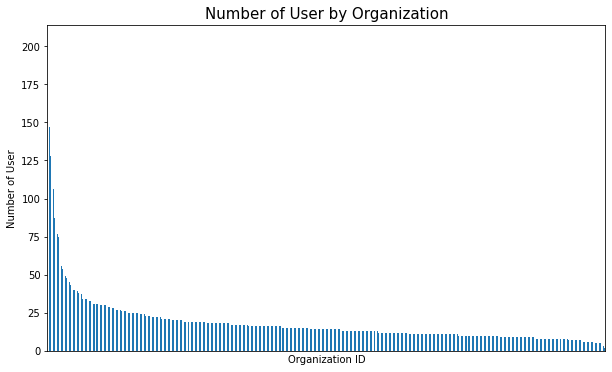

In [39]:
plt.figure(figsize=(10,6))
user_eng.org_id.value_counts().plot.bar()
plt.tick_params(axis='x', bottom=False, labelbottom=False)
plt.xlabel('Organization ID')
plt.ylabel('Number of User')
_ = plt.title('Number of User by Organization',fontsize=15)

org_id
336    0.833333
231    0.777778
322    0.750000
235    0.750000
359    0.666667
         ...   
237    0.000000
183    0.000000
412    0.000000
143    0.000000
416    0.000000
Name: adopted_user, Length: 417, dtype: float64


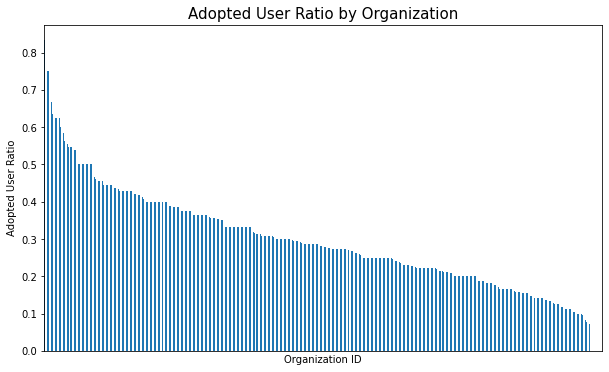

In [40]:
print(user_eng.groupby('org_id').mean().adopted_user.sort_values(ascending=False))
plt.figure(figsize=(10,6))
user_eng.groupby('org_id').mean().adopted_user.sort_values(ascending=False).plot.bar()
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    bottom=False,      # ticks along the bottom edge are off
    labelbottom=False) 
plt.xlabel('Organization ID')
plt.ylabel('Adopted User Ratio')
_ = plt.title('Adopted User Ratio by Organization',fontsize=15)

The adopted user ratio ranges from 0 to 0.833 based on the groups that the users belongs to. We will add a new column to reflect the ratio.

In [41]:
# Add a new column to reflect adopted user ratio by organization
adopted_ratio_by_org = user_eng.groupby('org_id').mean().adopted_user.reset_index().rename(
    {'adopted_user': 'adopted_ratio_by_org'}, axis=1)
adopted_ratio_by_org

,org_id,adopted_ratio_by_org
0,0,0.098039
1,1,0.136054
2,2,0.125000
3,3,0.145455
4,4,0.188679
...,...,...
412,412,0.000000
413,413,0.300000
414,414,0.333333
415,415,0.500000


In [42]:
user_eng = user_eng.merge(adopted_ratio_by_org, on='org_id', how='left')
user_eng.head()

,object_id,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,num_visit,adopted_user,month_last,high_month,adopted_ratio_by_org
0,2,ORG_INVITE,2014-03-31,0,0,1,316.0,14,1,2014-03-01,0,0.136054
1,3,ORG_INVITE,2013-03-19,0,0,94,1525.0,1,0,2013-03-01,0,0.363636
2,4,GUEST_INVITE,2013-05-22,0,0,1,5151.0,1,0,2013-05-01,0,0.136054
3,5,GUEST_INVITE,2013-01-22,0,0,193,5240.0,1,0,2013-01-01,0,0.500000
4,6,GUEST_INVITE,2013-12-19,0,0,197,11241.0,1,0,2013-12-01,0,0.200000


In [43]:
user_eng[['adopted_ratio_by_org', 'adopted_user']].corr()

,adopted_ratio_by_org,adopted_user
adopted_ratio_by_org,1.00000,0.27519
adopted_user,0.27519,1.00000


### Creation Source

In [44]:
user_eng.groupby('creation_source').mean().adopted_user.sort_values(ascending=False)

creation_source
GUEST_INVITE          0.330383
PERSONAL_PROJECTS     0.302395
ORG_INVITE            0.254816
SIGNUP_GOOGLE_AUTH    0.232657
SIGNUP                0.227973
Name: adopted_user, dtype: float64

The percentile of adopted user who are invited as a guest or invited to join another user's personal workspace are higher than the other three creation sources

### Invited by User Id

The missing values in the `invited_by_user_id` column means the user was not invited by other users. Before processing missing values, we will check the relationship between the invite users and the adopted users

In [45]:
# Build the list to store the users who are adopted users and also have invited other users
adopted_inviter = [user_id for user_id in user_eng.invited_by_user_id.unique() if user_id in adopted_user_list]

adopted_inviter_size = len(adopted_inviter)
adopted_inviter_size

425

In [46]:
# Total number of users
user_size = len(user_eng.object_id.unique())
# The number of users who have invited other users
inviter_size = len(user_eng.invited_by_user_id.unique())
# The number of adopted user
adopted_user_size = len(adopted_user_list) 

# Calculate the ratio of adopted user to total user
adopted_user_ratio = adopted_user_size / user_size
print('The ratio of adopted user to total user is {:.1%}'.format(adopted_user_ratio))

# Calculate the ratio of adopted inviter to total inviter
adopted_inviter_ratio = adopted_inviter_size / inviter_size
print('The ratio of adopted inviter to total inviter is {:.1%}'.format(adopted_inviter_ratio))

The ratio of adopted user to total user is 28.2%
The ratio of adopted inviter to total inviter is 20.6%


The proportion of adopted user in the users who have invited other users is lower than its proportion in the total users.

We will label all the invited id as 1 and label missing value as 0

In [47]:
# Label all the invited id as 1 and label missing value as 0
user_eng.loc[user_eng[user_eng.invited_by_user_id.notna()].index, 'invited_by_user_id'] = 1
user_eng.invited_by_user_id.fillna(0, inplace=True)

user_eng.invited_by_user_id.value_counts()

1.0    4107
0.0    3473
Name: invited_by_user_id, dtype: int64

In [48]:
user_eng.groupby('invited_by_user_id').mean().adopted_user

invited_by_user_id
0.0    0.243881
1.0    0.279766
Name: adopted_user, dtype: float64

The users who are invited by other users is likely to be retained than the users who are not invited by other user.

### Number of Visit

               count        mean         std  min  25%   50%    75%    max
adopted_user                                                              
0             5584.0    1.084169    0.364176  1.0  1.0   1.0    1.0    5.0
1             1996.0  100.111723  128.951869  3.0  8.0  37.0  146.0  606.0


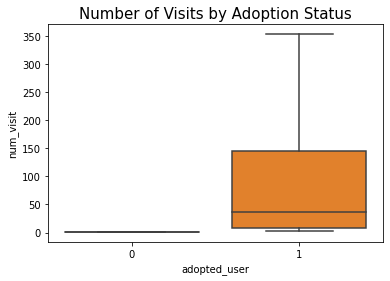

In [49]:
print(user_eng.groupby('adopted_user').num_visit.describe())
sns.boxplot(data=user_eng, y='num_visit',x='adopted_user', sym='')
_ = plt.title('Number of Visits by Adoption Status', fontsize=15)

In [50]:
user_eng[['num_visit', 'adopted_user']].corr()

,num_visit,adopted_user
num_visit,1.000000,0.550424
adopted_user,0.550424,1.000000


In [51]:
user_eng[['high_month', 'num_visit', 'adopted_user']].corr()

,high_month,num_visit,adopted_user
high_month,1.000000,0.667734,0.751494
num_visit,0.667734,1.000000,0.550424
adopted_user,0.751494,0.550424,1.000000


The number of visit of adopted user are much higher than non-adopted user

According to EDA, most of the factors have no strong correlation with the target feature, i.e., adopted_user, but if  a user had been active in 2014 April, May, and June, he/she is much likely be a adopted user. It looks like there was a change or event happened in and after 2014 April, which resulted the sharp raising of adopted user ratio. So if the event had long-term positive impact on users' adoption, the future users, i.e., the users who created account after 2014 June, would be very likely to be adopted user.

Besides,  adopted user's number of visit are much higher than non-adopted user. 

We will use heatmap to show the relationship between the features and build Random Forest model to figure out the feature importance.

## Preprocessing

In [52]:
user_eng.drop(columns=['object_id', 'last_session_creation_time', 'org_id', 'month_last'], inplace=True)

In [53]:
user_eng.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7580 entries, 0 to 7579
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   creation_source             7580 non-null   object 
 1   opted_in_to_mailing_list    7580 non-null   int64  
 2   enabled_for_marketing_drip  7580 non-null   int64  
 3   invited_by_user_id          7580 non-null   float64
 4   num_visit                   7580 non-null   int64  
 5   adopted_user                7580 non-null   int64  
 6   high_month                  7580 non-null   int64  
 7   adopted_ratio_by_org        7580 non-null   float64
dtypes: float64(2), int64(5), object(1)
memory usage: 791.0+ KB


In [54]:
user_eng.head()

,creation_source,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,num_visit,adopted_user,high_month,adopted_ratio_by_org
0,ORG_INVITE,0,0,1.0,14,1,0,0.136054
1,ORG_INVITE,0,0,1.0,1,0,0,0.363636
2,GUEST_INVITE,0,0,1.0,1,0,0,0.136054
3,GUEST_INVITE,0,0,1.0,1,0,0,0.500000
4,GUEST_INVITE,0,0,1.0,1,0,0,0.200000


In [55]:
# Process categorical feature
dummy_feature = pd.get_dummies(user_eng.creation_source)
user_eng.drop(columns='creation_source', inplace=True)
user_eng = pd.concat([user_eng, dummy_feature], axis=1)

user_eng.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,num_visit,adopted_user,high_month,adopted_ratio_by_org,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
0,0,0,1.0,14,1,0,0.136054,0,1,0,0,0
1,0,0,1.0,1,0,0,0.363636,0,1,0,0,0
2,0,0,1.0,1,0,0,0.136054,1,0,0,0,0
3,0,0,1.0,1,0,0,0.500000,1,0,0,0,0
4,0,0,1.0,1,0,0,0.200000,1,0,0,0,0


## Select Important Feature

adopted_user                  1.000000
high_month                    0.751494
num_visit                     0.550424
adopted_ratio_by_org          0.275190
GUEST_INVITE                  0.071067
invited_by_user_id            0.040595
PERSONAL_PROJECTS             0.027577
enabled_for_marketing_drip    0.004544
opted_in_to_mailing_list      0.003968
ORG_INVITE                   -0.014580
SIGNUP_GOOGLE_AUTH           -0.029929
SIGNUP                       -0.041896
Name: adopted_user, dtype: float64


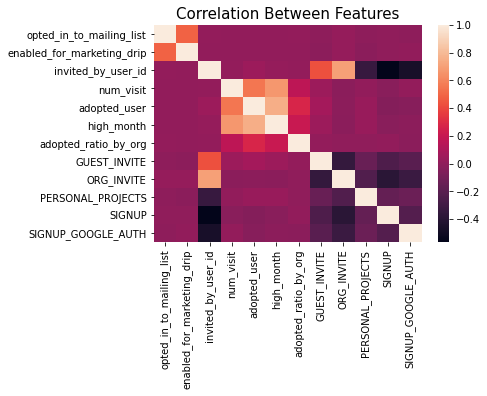

In [56]:
corr = user_eng.corr()
print(corr['adopted_user'].sort_values(ascending=False))
sns.heatmap(user_eng.corr())
_ = plt.title('Correlation Between Features', fontsize=15)

If active in or after 2014 April, number of visit in the first 30 days, and adopted user ratio by organization have strong, moderate and weak correlation with target feature respectively.

In [57]:
from sklearn.model_selection import train_test_split
X = user_eng.drop(columns='adopted_user')
y = user_eng.adopted_user
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [58]:
X_train.describe()

,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,num_visit,high_month,adopted_ratio_by_org,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
count,5.685000e+03,5.685000e+03,5.685000e+03,5.685000e+03,5.685000e+03,5.685000e+03,5.685000e+03,5.685000e+03,5.685000e+03,5.685000e+03,5.685000e+03
mean,-3.696447e-16,3.243960e-16,-3.332036e-16,-9.452031e-17,-5.598961e-17,-3.285948e-16,-4.648485e-16,2.906695e-16,1.528534e-16,-3.645281e-16,5.940718e-17
std,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00,1.000088e+00
min,-5.683450e-01,-4.198667e-01,-1.097036e+00,-3.278927e-01,-4.653636e-01,-2.163914e+00,-4.670410e-01,-7.616065e-01,-3.156155e-01,-5.137072e-01,-4.273761e-01
25%,-5.683450e-01,-4.198667e-01,-1.097036e+00,-3.278927e-01,-4.653636e-01,-7.923816e-01,-4.670410e-01,-7.616065e-01,-3.156155e-01,-5.137072e-01,-4.273761e-01
50%,-5.683450e-01,-4.198667e-01,9.115470e-01,-3.278927e-01,-4.653636e-01,-1.066154e-01,-4.670410e-01,-7.616065e-01,-3.156155e-01,-5.137072e-01,-4.273761e-01
75%,-5.683450e-01,-4.198667e-01,9.115470e-01,-3.030424e-01,-4.653636e-01,5.791507e-01,-4.670410e-01,1.313014e+00,-3.156155e-01,-5.137072e-01,-4.273761e-01
max,1.759495e+00,2.381708e+00,9.115470e-01,7.189320e+00,2.148858e+00,4.693748e+00,2.141140e+00,1.313014e+00,3.168412e+00,1.946634e+00,2.339860e+00


In [59]:
X_test.describe()

,opted_in_to_mailing_list,enabled_for_marketing_drip,invited_by_user_id,num_visit,high_month,adopted_ratio_by_org,GUEST_INVITE,ORG_INVITE,PERSONAL_PROJECTS,SIGNUP,SIGNUP_GOOGLE_AUTH
count,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000,1895.000000
mean,0.055688,0.019219,-0.034978,-0.011376,0.005058,0.012139,-0.001835,-0.034668,-0.034319,0.052366,0.016550
std,1.031403,1.018766,1.002893,0.936927,1.004501,0.989808,0.998725,0.990050,0.949417,1.035790,1.015836
min,-0.568345,-0.419867,-1.097036,-0.327893,-0.465364,-2.163914,-0.467041,-0.761607,-0.315616,-0.513707,-0.427376
25%,-0.568345,-0.419867,-1.097036,-0.327893,-0.465364,-0.703059,-0.467041,-0.761607,-0.315616,-0.513707,-0.427376
50%,-0.568345,-0.419867,0.911547,-0.327893,-0.465364,-0.106615,-0.467041,-0.761607,-0.315616,-0.513707,-0.427376
75%,1.759495,-0.419867,0.911547,-0.290617,-0.465364,0.579151,-0.467041,1.313014,-0.315616,-0.513707,-0.427376
max,1.759495,2.381708,0.911547,6.928392,2.148858,4.693748,2.141140,1.313014,3.168412,1.946634,2.339860


In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
rf = RandomForestClassifier(random_state=42)
selector = RFECV(rf, cv=5)
selector.fit(X_train, y_train)
optimized_columns = X_train.columns[selector.support_]
print(optimized_columns)

Index(['num_visit'], dtype='object')


num_visit                     0.741228
high_month                    0.203734
adopted_ratio_by_org          0.045807
opted_in_to_mailing_list      0.002190
GUEST_INVITE                  0.001674
enabled_for_marketing_drip    0.001324
SIGNUP                        0.000993
ORG_INVITE                    0.000842
SIGNUP_GOOGLE_AUTH            0.000801
invited_by_user_id            0.000724
PERSONAL_PROJECTS             0.000683
dtype: float64


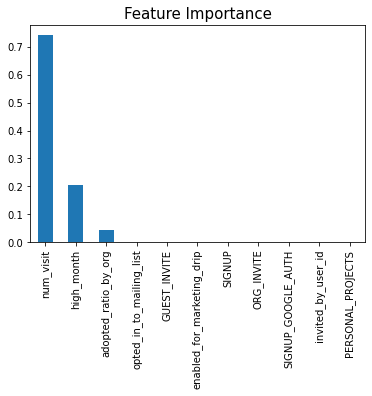

In [61]:
# Calculate feature importance 
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
importances=rf.feature_importances_
feature_names = X_train.columns
forest_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
print(forest_importances)

forest_importances.plot.bar()
_ = plt.title('Feature Importance', fontsize=15)

It’s surprising to see the high_month feature is not selected as an important feature by RFECV and RandomForestClassifer.